In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('customer_churn.csv')

In [3]:
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Problem Statement-
1. Find a model which can find whether customer will churn or not.
2. Find a model which can predict monthly charges.


# Perform EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data.duplicated().sum()

0

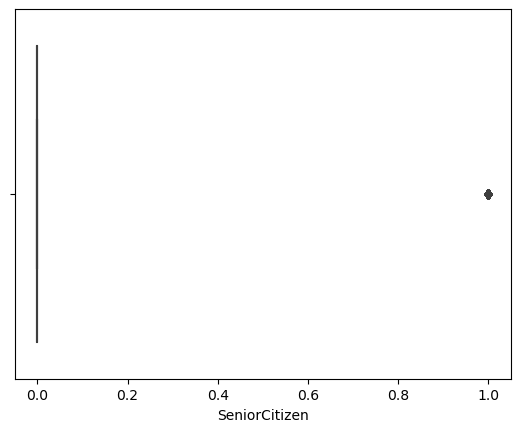

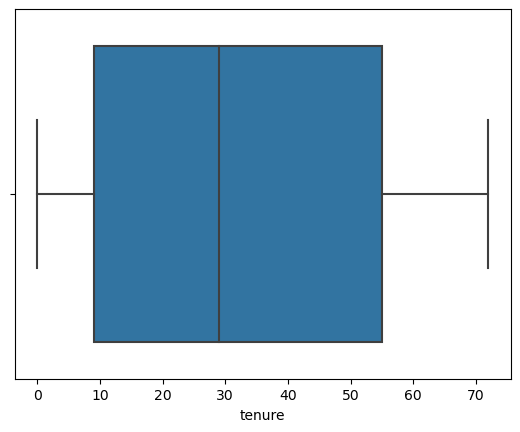

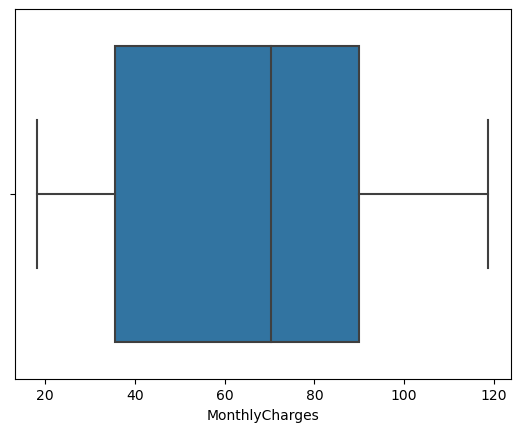

In [21]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(x=i, data=data)
        plt.show()

In [23]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [28]:
data.dropna(inplace=True)

In [31]:
data.isna().sum().sum()

0

In [37]:
data.drop(['customerID'], axis=1, inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])
    

<Axes: >

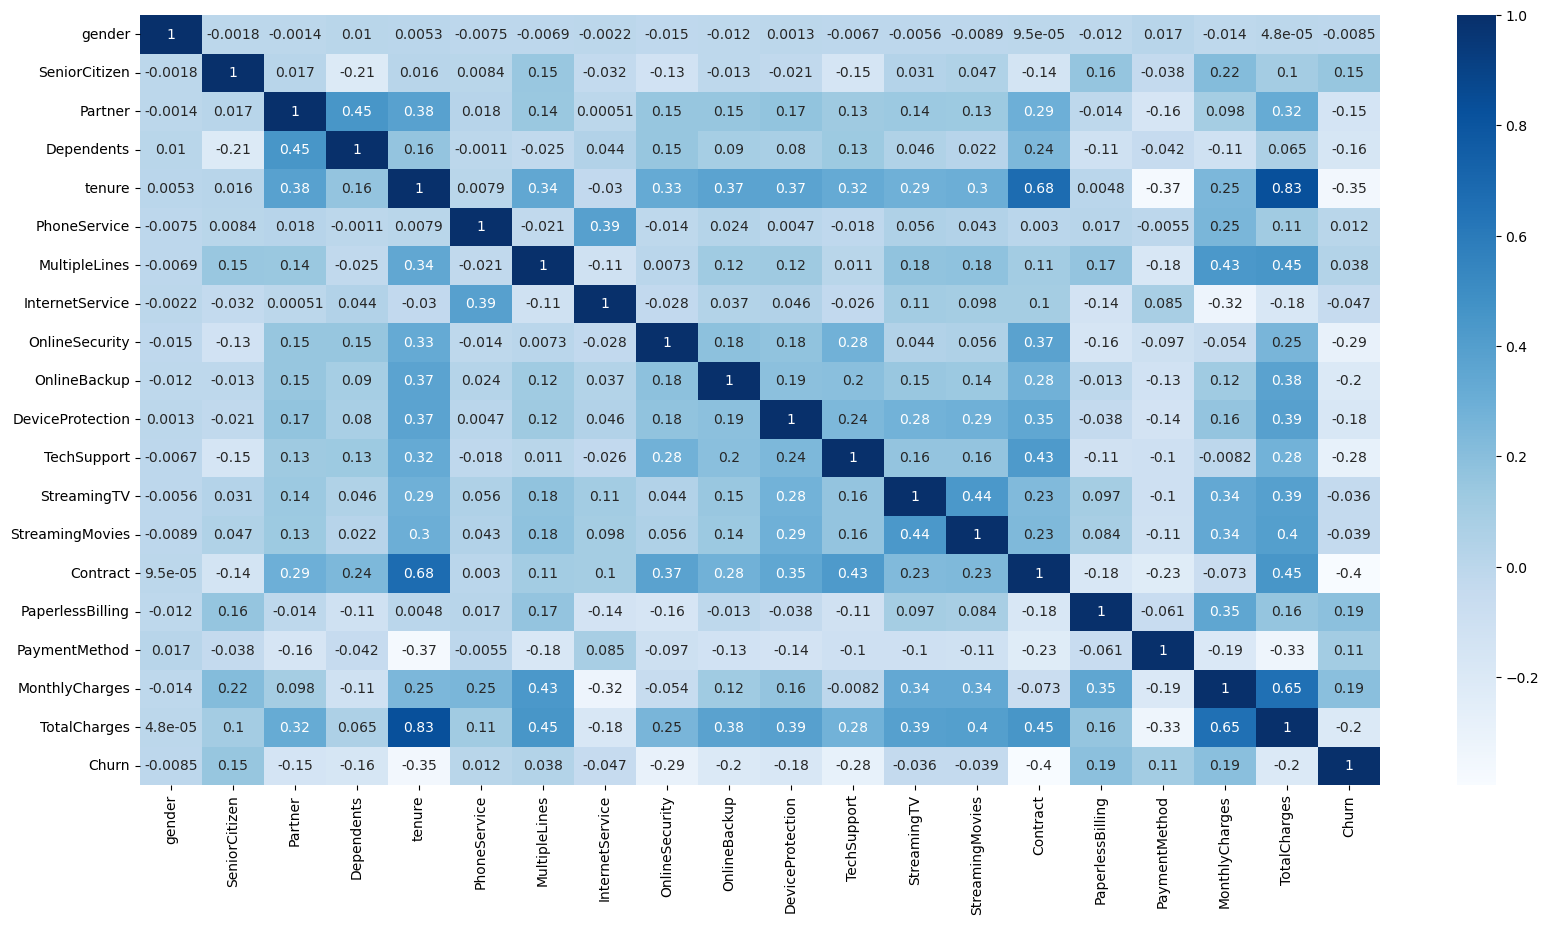

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True,cmap='Blues')

Remark= Churn(Target) doesnot have strong relation with any independents or feature. So no feature will be removed from here.
Now we will check for colinearity among independents or features.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [52]:
col=[]
for i in data.columns:
    if i!='Churn':
        col.append(i)



In [56]:
x=data[col]
new_data=pd.DataFrame()
new_data['Features']=x.columns
new_data['VIF_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [64]:
new_data

,Features,VIF_values
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


In [68]:
data.drop(['MonthlyCharges'], axis=1, inplace=True)

In [69]:
col=[]
for i in data.columns:
    if i!='Churn':
        col.append(i)
x=data[col]
new_data=pd.DataFrame()
new_data['Features']=x.columns
new_data['VIF_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
new_data


,Features,VIF_values
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [70]:
data.drop(['tenure'], axis=1, inplace=True)

In [71]:
col=[]
for i in data.columns:
    if i!='Churn':
        col.append(i)
x=data[col]
new_data=pd.DataFrame()
new_data['Features']=x.columns
new_data['VIF_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
new_data

,Features,VIF_values
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [72]:
data.drop(['PhoneService'], axis=1, inplace=True)

In [73]:
col=[]
for i in data.columns:
    if i!='Churn':
        col.append(i)
x=data[col]
new_data=pd.DataFrame()
new_data['Features']=x.columns
new_data['VIF_values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
new_data

,Features,VIF_values
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


Above all VIF_values are <=5. Thus, we can proceed with ML.

In [74]:
from sklearn.model_selection import train_test_split

In [77]:
X=data.iloc[:,:-1]

In [81]:
Y=data.iloc[:,-1]

In [83]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, train_size=0.7, random_state=45)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
Log=LogisticRegression()

In [86]:
Log.fit(X_train, Y_train)

LogisticRegression()

In [87]:
pred_Y=Log.predict(X_test)

In [88]:
from sklearn.metrics import *

In [89]:
accuracy_score(Y_test,pred_Y)

0.7815165876777251